In [1]:
import numpy as np
import tensorflow as tf

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)


In [2]:
reset_graph()

x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y + 2
f

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [3]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)
sess.close()

42


In [4]:
from sklearn.datasets import fetch_california_housing

reset_graph()

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]


In [5]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [6]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

Epoch 0 MSE = 9.161542
Epoch 100 MSE = 0.71450055
Epoch 200 MSE = 0.56670487
Epoch 300 MSE = 0.55557173
Epoch 400 MSE = 0.5488112
Epoch 500 MSE = 0.5436363
Epoch 600 MSE = 0.53962904
Epoch 700 MSE = 0.5365092
Epoch 800 MSE = 0.53406775
Epoch 900 MSE = 0.5321473


In [7]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32)
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32)
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42))
y_pred = tf.matmul(X, theta)
error = y_pred - y
mse = tf.reduce_mean(tf.square(error))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 9.161542
Epoch 100 MSE = 0.7145004
Epoch 200 MSE = 0.56670487
Epoch 300 MSE = 0.55557173
Epoch 400 MSE = 0.5488112
Epoch 500 MSE = 0.5436363
Epoch 600 MSE = 0.53962904
Epoch 700 MSE = 0.5365092
Epoch 800 MSE = 0.53406775
Epoch 900 MSE = 0.5321473
Best theta:
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.6614528 ]
 [-0.6375277 ]]


In [8]:
n_epochs = 1000
learning_rate = 0.01

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

batch_size = 100
n_batches = int(np.ceil(m / batch_size))

def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)  # not shown in the book
    indices = np.random.randint(m, size=batch_size)  # not shown
    X_batch = scaled_housing_data_plus_bias[indices] # not shown
    y_batch = housing.target.reshape(-1, 1)[indices] # not shown
    return X_batch, y_batch

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()
    
    

In [9]:
reset_graph()

n_epochs = 1000                                                                       # not shown in the book
learning_rate = 0.01                                                                  # not shown

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")            # not shown
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")            # not shown
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")                                      # not shown
error = y_pred - y                                                                    # not shown
mse = tf.reduce_mean(tf.square(error), name="mse")                                    # not shown
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)            # not shown
training_op = optimizer.minimize(mse)                                                 # not shown

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())                                # not shown
            save_path = saver.save(sess, "/tmp/my_model.ckpt")
        sess.run(training_op)
    
    best_theta = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final.ckpt")

Epoch 0 MSE = 9.161542
Epoch 100 MSE = 0.7145004
Epoch 200 MSE = 0.56670487
Epoch 300 MSE = 0.55557173
Epoch 400 MSE = 0.5488112
Epoch 500 MSE = 0.5436363
Epoch 600 MSE = 0.53962904
Epoch 700 MSE = 0.5365092
Epoch 800 MSE = 0.53406775
Epoch 900 MSE = 0.5321473


In [10]:
reset_graph()

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:                                                        # not shown in the book
    sess.run(init)                                                                # not shown

    for epoch in range(n_epochs):                                                 # not shown
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()                                                     # not shown
    
file_writer.close()

In [11]:
reset_graph()

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
with tf.name_scope("loss"):
    error = y_pred - y
    square_error = tf.square(error, name="square_error")
    mse = tf.reduce_mean(square_error, name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:                                                        # not shown in the book
    sess.run(init)                                                                # not shown

    for epoch in range(n_epochs):                                                 # not shown
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()                                                     # not shown
    
file_writer.close()

In [12]:
# Build a dataflow graph.
c = tf.constant([[1.0, 2.0]])
d = tf.constant([[1.0], [1.0]])
e = tf.matmul(c, d)
f = tf.matmul(c, d, transpose_a = True, transpose_b = True)

# Construct a `Session` to execute the graph.
sess = tf.compat.v1.Session()

# Execute the graph and store the value that `e` represents in `result`.
result1, result2 = sess.run([e, f])
print(result1, "\n", result2, "\n")

print(e.eval(session=sess))
print(f.eval(session=sess))



[[3.]] 
 [[1. 1.]
 [2. 2.]] 

[[3.]]
[[1. 1.]
 [2. 2.]]


In [13]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

m = 1000
X_moons, y_moons = make_moons(n_samples=m, noise=0.1)

plt.plot(X_moons[:, 0][y_moons == 0], X_moons[:, 1][y_moons == 0], "bo")
plt.plot(X_moons[:, 0][y_moons == 1], X_moons[:, 1][y_moons == 1], "r^")

plt.legend()
plt.show()



W0809 21:00:20.374156 20380 legend.py:1282] No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

In [14]:
X_moons_with_bias = np.c_[np.ones((X_moons.shape[0], 1)), X_moons]
y_moons = y_moons.reshape(-1, 1)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons_with_bias, y_moons, test_size=0.2)

In [16]:
def random_batch(X_train, y_train, batch_size):
    idxs = np.random.randint(0, X_train.shape[0], size=batch_size)
    
    return X_train[idxs], y_train[idxs]

X_batch, y_batch = random_batch(X_train, y_train, 20)

In [17]:
print(X_batch.shape, y_batch.shape)

(20, 3) (20, 1)


In [18]:
reset_graph()
n_input = 2

X = tf.placeholder(tf.float32, shape=(None, n_input + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n_input + 1, 1], -1, 1), name="theta")
y_proba = tf.sigmoid(tf.matmul(X, theta), name="y_proba")
loss = tf.losses.log_loss(y, y_proba)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(X_train.shape[0] / batch_size))

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            
        if epoch % 100 == 0:
            print("Epoch ", epoch, " loss:\t", loss.eval(feed_dict={X: X_batch, y: y_batch}))

#     --- test set
    y_proba_val = y_proba.eval(feed_dict={X:X_test, y:y_test})

W0809 21:00:20.586989 20380 deprecation.py:323] From C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\tensorflow\python\ops\losses\losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch  0  loss:	 0.70359015
Epoch  100  loss:	 0.25908938
Epoch  200  loss:	 0.26587042
Epoch  300  loss:	 0.32857713
Epoch  400  loss:	 0.25393873
Epoch  500  loss:	 0.23496322
Epoch  600  loss:	 0.13908304
Epoch  700  loss:	 0.2053196
Epoch  800  loss:	 0.20755166
Epoch  900  loss:	 0.3417452


In [19]:
np.mean(y_proba_val)

0.5169068

In [20]:
y_pred = (y_proba_val >= 0.5)

In [21]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

print("precision_score: ", precision_score(y_pred, y_test))
print("recall_score: ", recall_score(y_pred, y_test))
print("conf mx: \n", (confusion_matrix(y_pred, y_test)))


precision_score:  0.8679245283018868
recall_score:  0.8761904761904762
conf mx: 
 [[81 14]
 [13 92]]


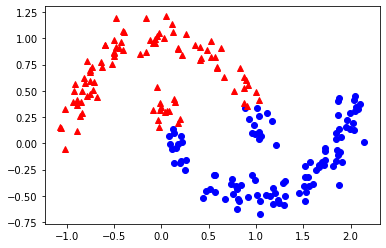

In [25]:
plt.plot(X_test[(y_proba_val > 0.5).ravel(), 1], X_test[(y_proba_val > 0.5).ravel(), 2], "bo")
plt.plot(X_test[(y_proba_val == 0.5).ravel(), 1], X_test[(y_proba_val == 0.5).ravel(), 2], "go")

plt.plot(X_test[(y_proba_val < 0.5).ravel(), 1], X_test[(y_proba_val < 0.5).ravel(), 2], "r^")
plt.show()

In [24]:
X_train.shape

(800, 3)

In [175]:
def logistic_regression(X, y, initializer = None, learning_rate=0.01):
    n_input_with_bias = int(X.shape[1])

    with tf.name_scope("logistic_regression"):
        with tf.name_scope("model"):
            if initializer is None:
                initializer = tf.random_uniform([n_input_with_bias, 1], -1.0, 1.0)
            theta = tf.Variable(initializer, name="theta")
            y_proba = tf.sigmoid(tf.matmul(X, theta), name="y_proba")

        with tf.name_scope("train"):
            loss = tf.losses.log_loss(y, y_proba)
            loss_summary = tf.summary.scalar('log_loss', loss)

            optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
            training_op = optimizer.minimize(loss)

        with tf.name_scope("init"):
            init = tf.global_variables_initializer()

        with tf.name_scope("saver"):
            saver = tf.train.Saver()

    return y_proba, loss, training_op, loss_summary, init, saver





In [176]:
from datetime import datetime

def LogDir(prefix = ""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "_"
    name = prefix + "run_" + now
    
    return "{}/{}/".format(root_logdir, name)

In [187]:
import os

X_train_enchanced = np.c_[X_train, X_train[:, 1]**2, X_train[:, 2]**2, X_train[:, 1]**3, X_train[:, 2]**3]
X_test_enchanced = np.c_[X_test, X_test[:, 1]**2, X_test[:, 2]**2, X_test[:, 1]**3, X_test[:, 2]**3]

n_inputs = X_train_enchanced.shape[1]
log_dir = LogDir("logreg")

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(X, y)

file_writer = tf.summary.FileWriter(log_dir, tf.get_default_graph())

n_epochs = 1001
batch_size = 50
n_batches = int(np.ceil(X_train.shape[0] / batch_size))

checkpoint_path = "/tmp/my_logreg_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "/tmp/my_logreg_model"

with tf.Session() as sess:
    if os.path.isfile(checkpoint_path):
        # --- restore model if checkpoint exists
        print ("restore checkpoint from ", checkpoint_path)
        start_epoch = 0
        saver.restore(checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)
        
    for epoch in range(start_epoch, n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train_enchanced, y_train, batch_size=batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})

        loss_val, loss_summary_str = sess.run([loss, loss_summary], feed_dict={X:X_test_enchanced, y:y_test})
        file_writer.add_summary(loss_summary_str, epoch)

        if(epoch % 1000 == 0):
            print("epoch: {}\tloss: {}".format(epoch, loss_val))
            saver.save(sess, checkpoint_path)

    saver.save(sess, final_model_path)
    y_proba_val = y_proba.eval(feed_dict={X:X_test_enchanced, y:y_test})

    
    x_c = y_c = np.arange(-3.0, 3.0, 0.1)
    X_C, Y_C = np.meshgrid(x_c, y_c)
    X_C_raveled = X_C.ravel()
    Y_C_raveled = Y_C.ravel()
    X_test_1 = np.c_[np.ones((X_C_raveled.shape[0], 1)), X_C_raveled, Y_C_raveled, X_C_raveled**2, Y_C_raveled**2, X_C_raveled**3, Y_C_raveled**3]

    y_test_1 = y_proba.eval(feed_dict={X:X_test_1}, session=sess)
    y_test_1 = sess.run(y_proba, feed_dict={X:X_test_1})

epoch: 0	loss: 0.3642893135547638
epoch: 1000	loss: 0.1290714144706726


In [206]:
from sklearn.metrics import f1_score

y_pred = (y_proba_val > 0.5)
print("precision: ", precision_score(y_pred, y_test))
print("recall: ", recall_score(y_pred, y_test))
print("f1 score: ", f1_score(y_pred, y_test))


precision:  0.9622641509433962
recall:  0.9444444444444444
f1 score:  0.9532710280373832


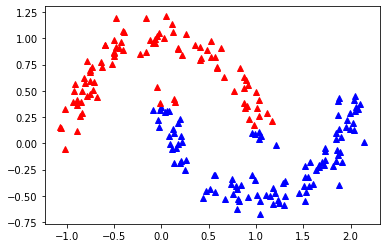

In [198]:
plt.plot(X_test[y_pred.ravel(), 1], X_test[y_pred.ravel(), 2], "b^")
plt.plot(X_test[~y_pred.ravel(), 1], X_test[~y_pred.ravel(), 2], "r^")

plt.show()

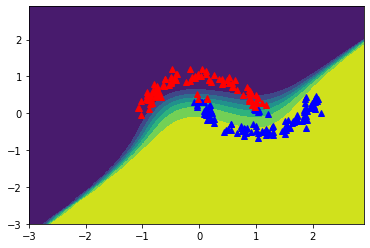

In [190]:
fig1, ax1 = plt.subplots()
ax1.contourf(X_C, Y_C, y_test_1.reshape(X_C.shape))
ax1.plot(X_test[y_pred.ravel(), 1], X_test[y_pred.ravel(), 2], "b^")
ax1.plot(X_test[~y_pred.ravel(), 1], X_test[~y_pred.ravel(), 2], "r^")
